# Actividad Formativa 3

In [1]:
from sklearn.datasets import fetch_olivetti_faces

# Cargamos los datos
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

print(X.data.shape)

(400, 4096)


## Aplicar min-max scaler

In [2]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=400)
pca.fit(X)

PCA(n_components=400)

In [4]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


## Calculamos las compoenntes para retener el 95% de la varianza del dataset original
min_var(0.95,pca.explained_variance_ratio_)

121

In [14]:
pca = PCA(n_components=121)
X_= pca.fit_transform(X)

In [15]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(X_)
scores = lof.negative_outlier_factor_

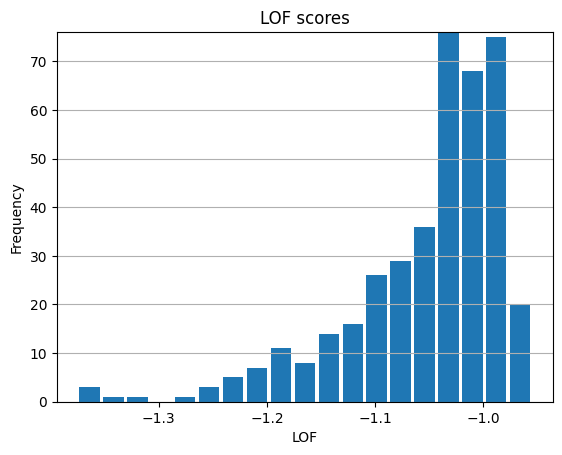

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))


plot_hist(scores, 'LOF scores')

In [17]:
def lof_threshold(v,scores):
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold

lof_threshold(-1.25,scores)

0.015

In [18]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.0175)
labels = lof.fit_predict(X_)

In [19]:
indices = list(np.where(labels==1)[0])
X_ = X_[indices,:]
y = y[indices,]
X_.shape, y.shape

((393, 121), (393,))

Construir una proyección t-SNE

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler

def plot_embedding(X, title):
    _, ax = plt.subplots(figsize=(8, 8))
    X = MinMaxScaler().fit_transform(X)

    for digit in faces.target:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.425, # The alpha blending value, between 0 (transparent) and 1 (opaque)
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(faces.images[i], cmap=plt.cm.gray_r), X[i] 
        ) # Container referring to a specific position xy defined by X[i]
        imagebox.set()
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

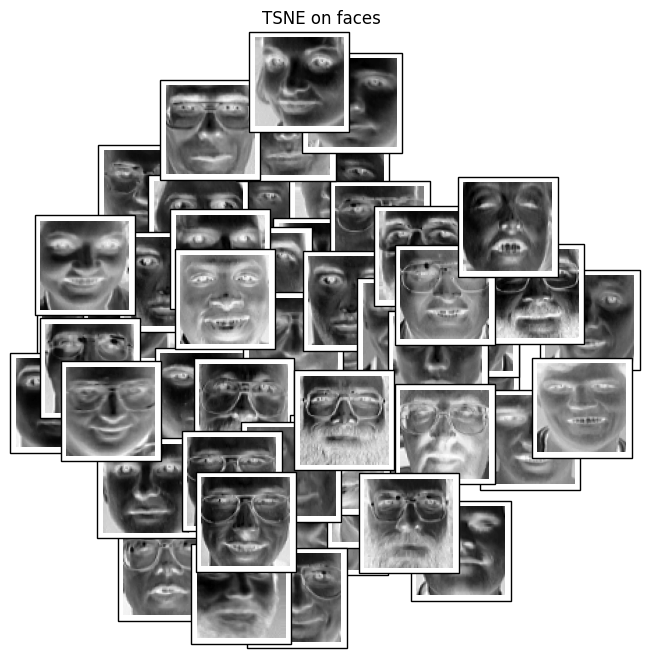

In [55]:
from sklearn.manifold import TSNE

tsne_embed = TSNE(n_components=2, perplexity=10, n_iter=500, n_iter_without_progress=150, n_jobs=8)
projection = tsne_embed.fit_transform(X_, y)
plot_embedding(projection, 'TSNE on faces')
plt.show()

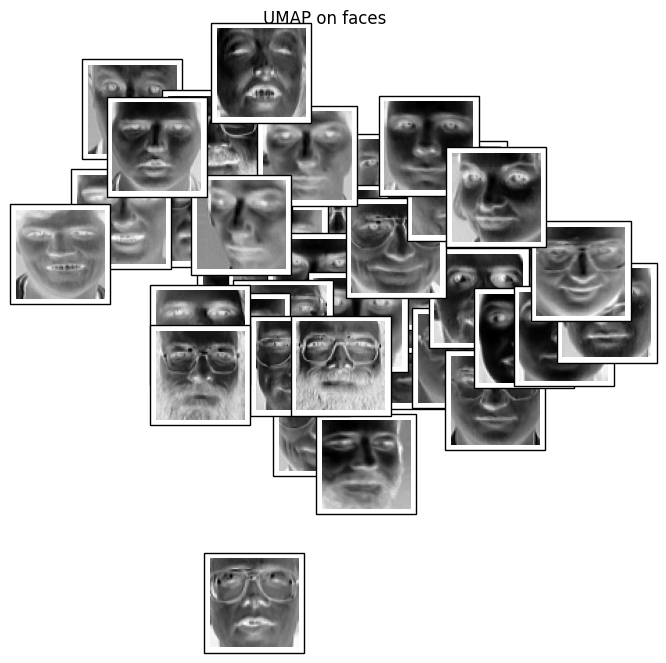

In [60]:
import umap.umap_ as umap

umap_2d = umap.UMAP(n_components = 2, min_dist = 0.6, n_neighbors= 10, n_jobs=8)
projection = umap_2d.fit_transform(X_)
plot_embedding(projection, 'UMAP on faces')
plt.show()

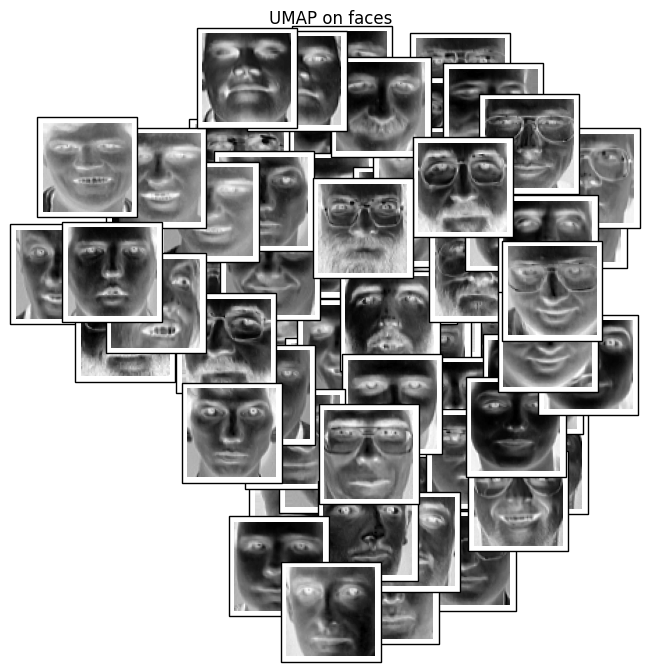

In [59]:
import umap.umap_ as umap

umap_2d = umap.UMAP(n_components = 2, min_dist = 0.6, n_neighbors= 20, n_jobs=8)
projection = umap_2d.fit_transform(X_)
plot_embedding(projection, 'UMAP on faces')
plt.show()